In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
ensembles_DK1_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK1_fixed_v2.pkl")

Y_DK1_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK1_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK1_SolarPower = actuals["SolarPower"]

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK2_fixed.pkl")
ensembles_DK2_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK2_fixed.pkl")
ensembles_DK2_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK2_fixed.pkl")
ensembles_DK2_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK2_fixed_v2.pkl")
Y_DK2_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK2_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK2_SolarPower = actuals["SolarPower"]


In [10]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(data):
    """
    Calculate the first four moments (mean, variance, skewness, kurtosis) for a one-dimensional series of data.

    Parameters:
    data (array-like): Input data.

    Returns:
    dict: A dictionary containing the mean, variance, skewness, and kurtosis.
    """
    mean = np.mean(data)
    variance = np.std(data, ddof=1)
    skewness = skew(data)
    kurt = kurtosis(data)
    
    return {
        'Mean': mean,
        'Std': variance,
        'Skewness': skewness,
        'Kurtosis': kurt
    }


In [12]:
# Applying function to data
data_sets = {
    "DK1-OnshoreWindPower": Y_DK1_OnshoreWindPower[~Y_DK1_OnshoreWindPower.isna()],
    "DK1-OffshoreWindPower": Y_DK1_OffshoreWindPower[~Y_DK1_OffshoreWindPower.isna()],
    "DK1-SolarPower": Y_DK1_SolarPower[~Y_DK1_SolarPower.isna()],
    "DK2-OnshoreWindPower": Y_DK2_OnshoreWindPower[~Y_DK2_OnshoreWindPower.isna()],
    "DK2-OffshoreWindPower": Y_DK2_OffshoreWindPower[~Y_DK2_OffshoreWindPower.isna()],
    "DK2-SolarPower": Y_DK2_SolarPower[~Y_DK2_SolarPower.isna()],
}

results = {name: calculate_moments(data) for name, data in data_sets.items()}

# Convert results to a DataFrame for easy LaTeX export
results_df = pd.DataFrame(results).T

# Exporting to LaTeX
latex_table = results_df.to_latex()

# Save the LaTeX table to a file
with open("moments_results.tex", "w") as f:
    f.write(latex_table)

# Display the results dataframe
print(results_df)

                              Mean         Std  Skewness  Kurtosis
DK1-OnshoreWindPower   1047.098866  870.592284  0.852308 -0.179594
DK1-OffshoreWindPower   573.489357  390.334733  0.067719 -1.404120
DK1-SolarPower          195.514019  338.856791  2.110029  4.232350
DK2-OnshoreWindPower    191.094098  151.185704  0.842464 -0.328073
DK2-OffshoreWindPower   423.102018  329.333154  0.240279 -1.433263
DK2-SolarPower           83.344499  138.299297  1.760635  2.119120


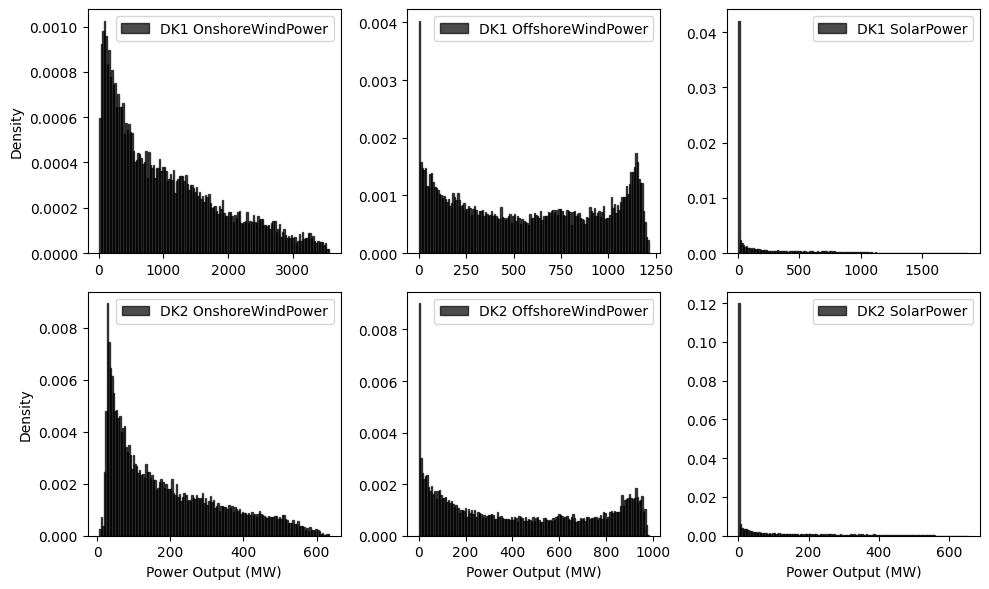

In [59]:
data_sets = {
    "DK1-OnshoreWindPower": Y_DK1_OnshoreWindPower[~pd.isna(Y_DK1_OnshoreWindPower)],
    "DK1-OffshoreWindPower": Y_DK1_OffshoreWindPower[~pd.isna(Y_DK1_OffshoreWindPower)],
    "DK1-SolarPower": Y_DK1_SolarPower[(~pd.isna(Y_DK1_SolarPower)) ], #& (Y_DK1_SolarPower != 0)],
    "DK2-OnshoreWindPower": Y_DK2_OnshoreWindPower[~pd.isna(Y_DK2_OnshoreWindPower)],
    "DK2-OffshoreWindPower": Y_DK2_OffshoreWindPower[~pd.isna(Y_DK2_OffshoreWindPower)],
    "DK2-SolarPower": Y_DK2_SolarPower[(~pd.isna(Y_DK2_SolarPower)) ], #& (Y_DK2_SolarPower != 0)],
}

# Creating the subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6), sharey=False)
axs = axs.flatten()

for i, (key, data) in enumerate(data_sets.items()):
    axs[i].hist(data, bins=150, color='black', alpha=0.7, edgecolor='black', density=True, label = key.replace("-", " "))
    #axs[i].set_title(key.replace("-", " "))
    if i > 2:
        axs[i].set_xlabel('Power Output (MW)')
    else:
        axs[i].set_xlabel('')

    if i in [0, 3]:
        axs[i].set_ylabel('Density')
    else:
        axs[i].set_ylabel('')
    axs[i].legend()

plt.tight_layout()
# plt.legend()
plt.savefig("power_output_histograms_density.pdf")
plt.show()

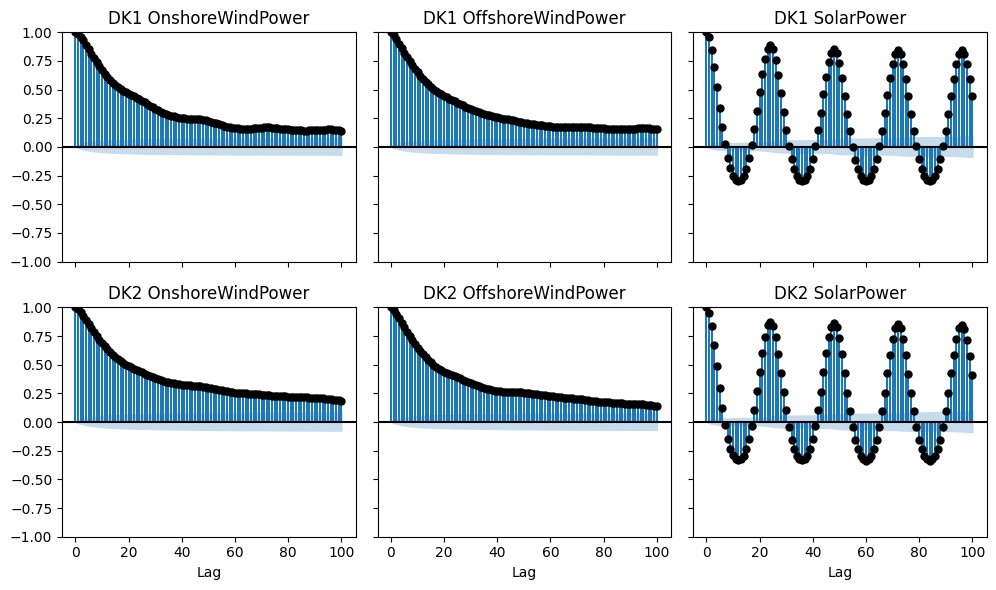

In [60]:
# Creating the subplots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
fig, axs = plt.subplots(2, 3, figsize=(10, 6), sharey=False)
axs = axs.flatten()

for i, (key, data) in enumerate(data_sets.items()):
    plot_acf(data, ax=axs[i], color='black', lags=100, label = key.replace("-", " "))
    axs[i].set_title(key.replace("-", " "))
    if i > 2:
        axs[i].set_xlabel('Lag')
    else:
        axs[i].set_xlabel('')
        axs[i].set_xticklabels([]) 

    if i in [0, 3]:
        # show y axis numbers
        axs[i].y_ticks = False
    else:
        axs[i].set_yticklabels([]) 
    # axs[i].legend()
plt.tight_layout()
plt.savefig("acf_plots.pdf")
plt.show()

<Figure size 2000x1000 with 0 Axes>

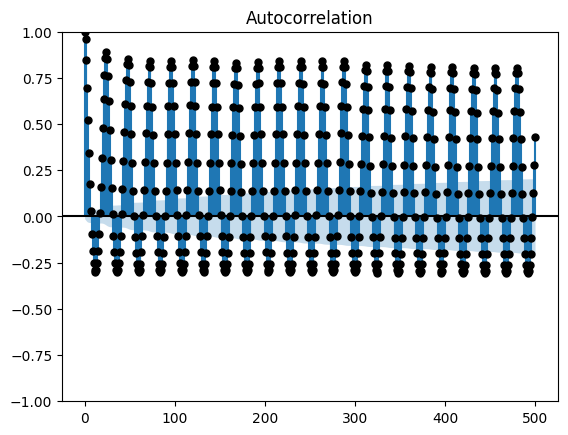

In [61]:
plt.figure(figsize=(20,10))
plot_acf(Y_DK1_SolarPower[(~pd.isna(Y_DK1_SolarPower))], color='black', lags=500)
plt.show()

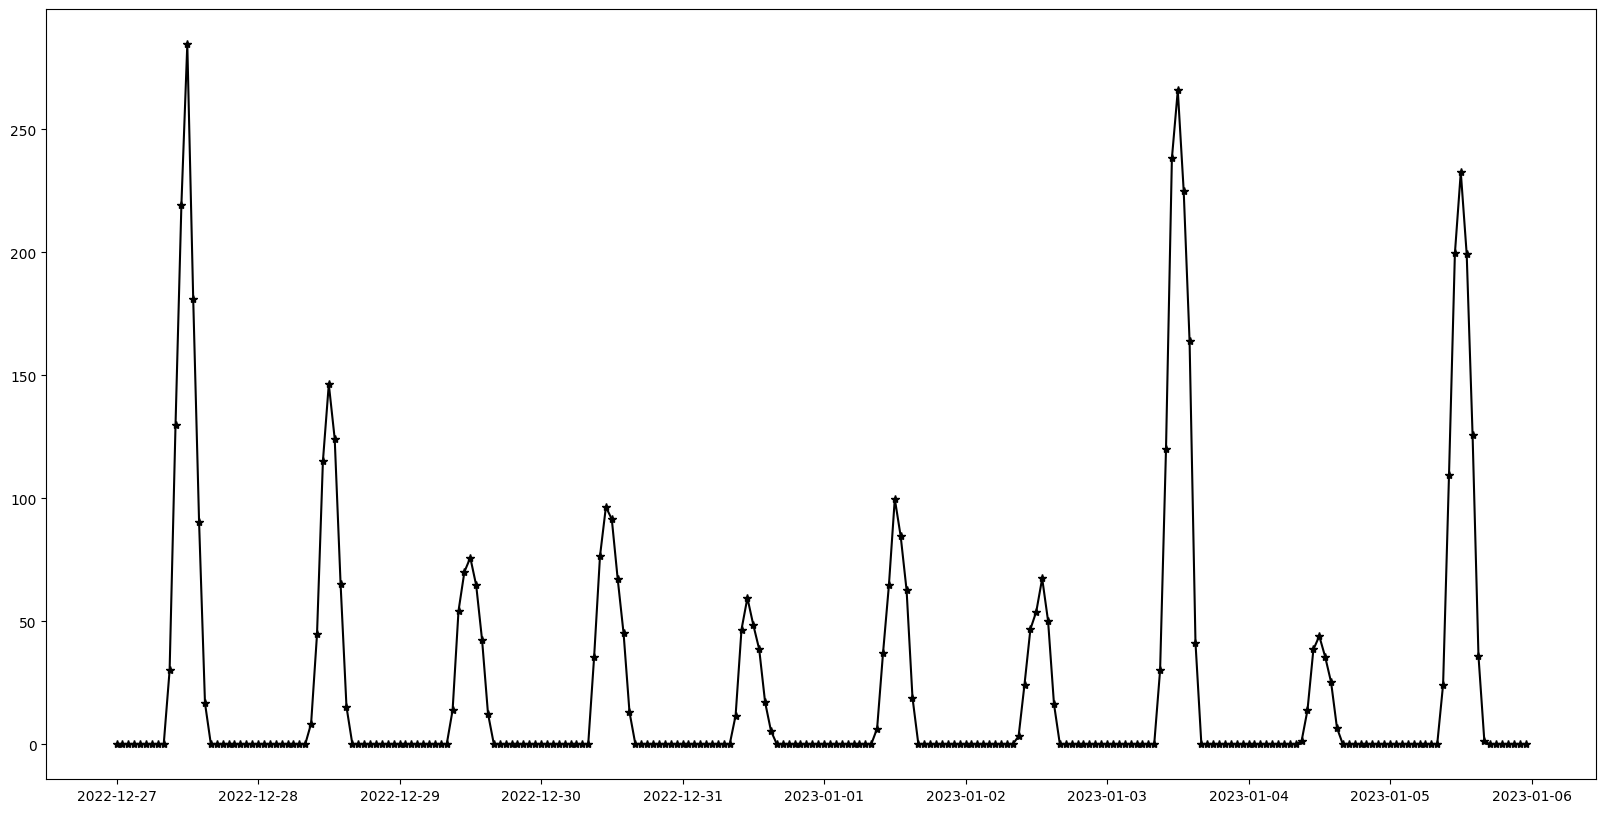

In [56]:
plt.figure(figsize=(20,10))
plt.plot(Y_DK1_SolarPower.iloc[24*360:24*370], '*-', color='black')

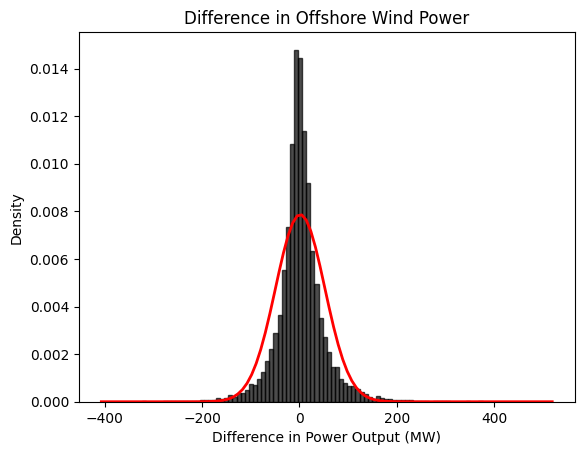

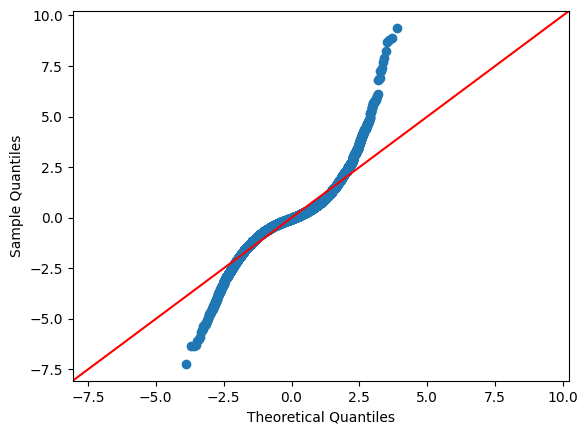

T-distribution parameters: (2.2062559816465326, -0.06102035459571706, 26.491880557130695)


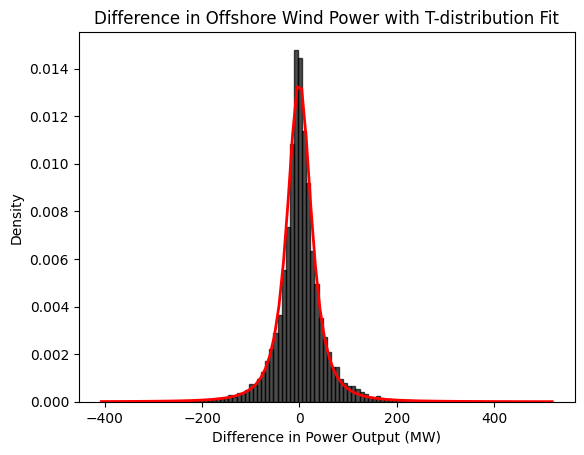

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import statsmodels.api as sm

# Assuming ensembles_DK1_offshorewindpower is already defined and loaded
X = ensembles_DK1_offshorewindpower.iloc[:, [0, 1]].values

# Histogram of the differences
differences = X[:, 0] - X[:, 1]
plt.hist(differences, bins=100, color='black', alpha=0.7, edgecolor='black', density=True)

# Fit Gaussian
mu, std = norm.fit(differences)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Difference in Offshore Wind Power")
plt.xlabel("Difference in Power Output (MW)")
plt.ylabel("Density")
plt.show()

# QQ plot
fig = sm.qqplot(differences, line='45', fit=True, dist=stats.norm)
plt.show()

# Fit a t distribution
params = t.fit(differences)
print("T-distribution parameters:", params)

# Plot t-distribution fit
plt.hist(differences, bins=100, color='black', alpha=0.7, edgecolor='black', density=True)
x = np.linspace(xmin, xmax, 100)
p = t.pdf(x, *params)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Difference in Offshore Wind Power with T-distribution Fit")
plt.xlabel("Difference in Power Output (MW)")
plt.ylabel("Density")
plt.show()